In [12]:
import os
import sys
import matplotlib
# matplotlib.use('TKAgg')
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from __future__ import division

import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torchvision.datasets as dset

from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader

from PIL import Image

In [ ]:
!wget http://images.cocodataset.org/zips/val2017.zip

--2020-11-07 10:40:55--  http://images.cocodataset.org/zips/val2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.33.148
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.33.148|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 815585330 (778M) [application/zip]
Saving to: ‘val2017.zip’

val2017.zip         100%[===================>] 777.80M  16.9MB/s    in 48s     

2020-11-07 10:41:44 (16.3 MB/s) - ‘val2017.zip’ saved [815585330/815585330]



In [ ]:
!wget http://images.cocodataset.org/zips/train2017.zip

--2020-11-07 10:41:49--  http://images.cocodataset.org/zips/train2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.20.195
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.20.195|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19336861798 (18G) [application/zip]
Saving to: ‘train2017.zip’

train2017.zip       100%[===================>]  18.01G  16.6MB/s    in 18m 38s 

2020-11-07 11:00:27 (16.5 MB/s) - ‘train2017.zip’ saved [19336861798/19336861798]



In [ ]:
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip

--2020-11-07 11:02:41--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.88.51
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.88.51|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘annotations_trainval2017.zip’

annotations_trainva 100%[===================>] 241.19M  17.0MB/s    in 16s     

2020-11-07 11:02:57 (15.3 MB/s) - ‘annotations_trainval2017.zip’ saved [252907541/252907541]



In [ ]:
!unzip val2017.zip

Streaming output truncated to the last 5000 lines.
 extracting: val2017/000000231527.jpg  
 extracting: val2017/000000578922.jpg  
 extracting: val2017/000000062808.jpg  
 extracting: val2017/000000119038.jpg  
 extracting: val2017/000000114871.jpg  
 extracting: val2017/000000463918.jpg  
 extracting: val2017/000000365745.jpg  
 extracting: val2017/000000320425.jpg  
 extracting: val2017/000000481404.jpg  
 extracting: val2017/000000314294.jpg  
 extracting: val2017/000000335328.jpg  
 extracting: val2017/000000513688.jpg  
 extracting: val2017/000000158548.jpg  
 extracting: val2017/000000132116.jpg  
 extracting: val2017/000000415238.jpg  
 extracting: val2017/000000321333.jpg  
 extracting: val2017/000000081738.jpg  
 extracting: val2017/000000577584.jpg  
 extracting: val2017/000000346905.jpg  
 extracting: val2017/000000433980.jpg  
 extracting: val2017/000000228144.jpg  
 extracting: val2017/000000041872.jpg  
 extracting: val2017/000000117492.jpg  
 extracting: val2017/00000036

In [ ]:
!unzip train2017.zip

Streaming output truncated to the last 5000 lines.
 extracting: train2017/000000381931.jpg  
 extracting: train2017/000000569592.jpg  
 extracting: train2017/000000229396.jpg  
 extracting: train2017/000000488990.jpg  
 extracting: train2017/000000348684.jpg  
 extracting: train2017/000000234031.jpg  
 extracting: train2017/000000563584.jpg  
 extracting: train2017/000000276069.jpg  
 extracting: train2017/000000401194.jpg  
 extracting: train2017/000000502089.jpg  
 extracting: train2017/000000192183.jpg  
 extracting: train2017/000000425127.jpg  
 extracting: train2017/000000126766.jpg  
 extracting: train2017/000000324161.jpg  
 extracting: train2017/000000452746.jpg  
 extracting: train2017/000000423782.jpg  
 extracting: train2017/000000546343.jpg  
 extracting: train2017/000000249290.jpg  
 extracting: train2017/000000025529.jpg  
 extracting: train2017/000000316928.jpg  
 extracting: train2017/000000337866.jpg  
 extracting: train2017/000000547768.jpg  
 extracting: train2017/00

In [ ]:
!unzip annotations_trainval2017.zip

Archive:  annotations_trainval2017.zip
  inflating: annotations/instances_train2017.json  
  inflating: annotations/instances_val2017.json  
  inflating: annotations/captions_train2017.json  
  inflating: annotations/captions_val2017.json  
  inflating: annotations/person_keypoints_train2017.json  
  inflating: annotations/person_keypoints_val2017.json  


In [ ]:
training_data = dset.CocoDetection(root = 'train2017', annFile = 'annotations/instances_train2017.json')

loading annotations into memory...
Done (t=15.86s)
creating index...
index created!


In [ ]:
len(training_data)

118287

In [ ]:
validation_data = dset.CocoDetection(root = 'val2017', annFile = 'annotations/instances_val2017.json')

loading annotations into memory...
Done (t=0.54s)
creating index...
index created!


In [ ]:
len(validation_data)

5000

In [ ]:
classes = ["person", "bicycle", "car", "motorcycle", "airplane", "bus", "train", "truck", "boat", "traffic light", 
           "fire hydrant", "street sign", "stop sign", "parking meter", "bench", "bird", "cat", "dog", "horse", 
           "sheep", "cow", "elephant", "bear", "zebra", "giraffe", "hat", "backpack", "umbrella", "shoe", "eye glasses", 
           "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard", "sports ball", "kite", "baseball bat", 
           "baseball glove", "skateboard", "surfboard", "tennis racket", "bottle", "plate", "wine glass", "cup", 
           "fork", "knife", "spoon", "bowl", "banana", "apple", "sandwich", "orange", "broccoli", "carrot", "hot dog", 
           "pizza", "donut", "cake", "chair", "couch", "potted plant", "bed", "mirror", "dining table", "window", "desk", 
           "toilet", "door", "tv", "laptop", "mouse", "remote", "keyboard", "cell phone", "microwave", "oven", "toaster", "sink", "refrigerator", 
           "blender", "book", "clock", "vase", "scissors", "teddy bear", "hair drier", "toothbrush", "hair brush",]

In [ ]:
len(classes)

91

In [ ]:
train_images = list()
train_annots = list()

for i in range(len(training_data)//30):  #Loop to iterate the training data
    train_images.append(training_data[i])
    train_annots.append(training_data[i])
    
print(len(train_images))

3942


In [ ]:
trained_image, trained_label = training_data[11421]

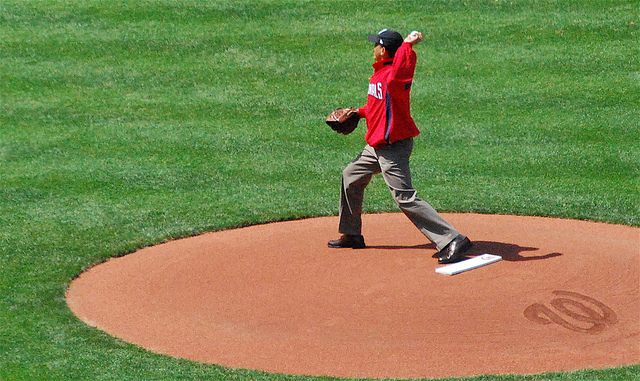

In [ ]:
trained_image

In [ ]:
#Converted image into np.array to get the information
trained_image=np.array(trained_image)
print('Image size: (Height, Width, RGB):', trained_image.shape)

Image size: (Height, Width, RGB): (381, 640, 3)


In [ ]:
total_bbox = 0
class_label_list= []
bounding_boxes = []

for d in trained_label:  #To iterate the trained labels
  bb = d['bbox']
  cl=d['category_id']
  class_label_list.append(cl)
  bounding_boxes.append(bb)
  total_bbox = total_bbox +1

In [ ]:
print('\nNum of objects:', total_bbox)
print('Bounding Boxes (num_boxes, x_min, y_min, x_max, y_max)')
print(bounding_boxes)


Num of objects: 3
Bounding Boxes (num_boxes, x_min, y_min, x_max, y_max)
[[409.77, 30.63, 8.6, 8.39], [325.8, 27.44, 148.3, 235.76], [324.93, 108.05, 35.08, 27.76]]


In [ ]:
print("Class Labels:")
for i in range(total_bbox):
  print(class_label_list[i],":",classes[class_label_list[i]-1])

Class Labels:
37 : sports ball
1 : person
40 : baseball glove


In [ ]:
trained_label = np.array(trained_label)
print("Shape of Class Label: ",trained_label.shape[0])

Shape of Class Label:  3


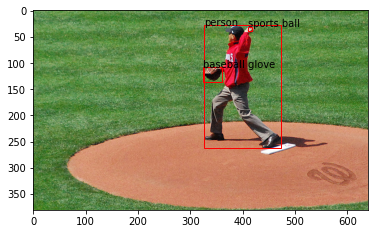

In [ ]:
im = np.array((trained_image), dtype=np.uint8)

fig,ax = plt.subplots()
# Displaying the image
ax.imshow(im)

for i in range(total_bbox):
    rect = patches.Rectangle((bounding_boxes[i][0],bounding_boxes[i][1]),bounding_boxes[i][2],bounding_boxes[i][3],linewidth=1,edgecolor='r',facecolor='none',)
    plt.text(bounding_boxes[i][0],bounding_boxes[i][1],classes[class_label_list[i]-1])
    ax.add_patch(rect)

    
plt.show()

In [7]:
import struct

from keras.models import Model
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import LeakyReLU  #Relu Activation function for Convolutional layer
from keras.layers import UpSampling2D
from keras.layers import ZeroPadding2D
from keras.layers import BatchNormalization
from keras.layers.merge import add, concatenate

In [8]:
def max_Pool_block(Input,psize,fil,strid,skip=True):
    op=MaxPool2D(input=Input,filter=fil,pool_size=(psize),strides=strid, padding='valid')
    return op

def convo_block(in_put, convolutions, skip=True):
    x = in_put
    count = 0
    for con in convolutions:
        if count == (len(convolutions) - 2) and skip:
            skipconnection = x
        count =count+ 1
        if con['stride'] > 1: x = ZeroPadding2D(((1,0),(1,0)))(x)
            #adding a convolutional layer to the network.
            #if padding =valid then 0 if check for same.
        x = Conv2D(con['filter'], con['kernel'], strides=con['stride'], padding='valid' if con['stride'] > 1 else 'same', 
                   name='conv_' + str(con['layer_idx']),
                   use_bias=False if con['bnorm'] else True)(x)
        #checking for batch normalisation
        if con['bnorm']: x = BatchNormalization(epsilon=0.001, name='bnorm_' + str(con['layer_idx']))(x)
        #checking for leaky relu
        if con['leaky']: x = LeakyReLU(alpha=0.1, name='leaky_' + str(con['layer_idx']))(x)
    return add([skipconnection, x]) if skip else x

In [3]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2020-11-08 00:44:24--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M   352KB/s    in 13m 11s 

2020-11-08 00:57:36 (306 KB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [9]:
# model taken from the reference
def make_yolov3_model():
    input_image = Input(shape=(None, None, 3))

    # layers from 0 to 4
    #parameters are given to the convolution block function
    x = convo_block(input_image, [{'filter': 32, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 0},
                                  {'filter': 64, 'kernel': 3, 'stride': 2, 'bnorm': True, 'leaky': True, 'layer_idx': 1},
                                  {'filter': 32, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 2},
                                  {'filter': 64, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 3}])
    # Layers from 5 to 8
    x = convo_block(x, [{'filter': 128, 'kernel': 3, 'stride': 2, 'bnorm': True, 'leaky': True, 'layer_idx': 5},
                        {'filter':  64, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 6},
                        {'filter': 128, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 7}])
    # Layers from 9 to 11
    x = convo_block(x, [{'filter':  64, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 9},
                        {'filter': 128, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 10}])
    # Layers from 12 to 15
    x = convo_block(x, [{'filter': 256, 'kernel': 3, 'stride': 2, 'bnorm': True, 'leaky': True, 'layer_idx': 12},
                        {'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 13},
                        {'filter': 256, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 14}])
    # Layers from 16 to 36
    for i in range(7):
        x = convo_block(x, [{'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 16+i*3},
                            {'filter': 256, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 17+i*3}])
    skip_36 = x
    # Layers from 37 to 40
    x = convo_block(x, [{'filter': 512, 'kernel': 3, 'stride': 2, 'bnorm': True, 'leaky': True, 'layer_idx': 37},
                        {'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 38},
                        {'filter': 512, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 39}])
    # Layers from 41 to 61
    for i in range(7):
        x = convo_block(x, [{'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 41+i*3},
                            {'filter': 512, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 42+i*3}])
    skip_61 = x
    # Layers from 62 to 65
    x = convo_block(x, [{'filter': 1024, 'kernel': 3, 'stride': 2, 'bnorm': True, 'leaky': True, 'layer_idx': 62},
                        {'filter':  512, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 63},
                        {'filter': 1024, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 64}])
    # Layers from 66 to 74
    for i in range(3):
        x = convo_block(x, [{'filter':  512, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 66+i*3},
                            {'filter': 1024, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 67+i*3}])
    # Layers from 75 to 79
    x = convo_block(x, [{'filter':  512, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 75},
                        {'filter': 1024, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 76},
                        {'filter':  512, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 77},
                        {'filter': 1024, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 78},
                        {'filter':  512, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 79}], skip=False)
    # Layers from 80 to 82
    yolo_till_layer_82 = convo_block(x, [{'filter': 1024, 'kernel': 3, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 80},
                              {'filter':  255, 'kernel': 1, 'stride': 1, 'bnorm': False, 'leaky': False, 'layer_idx': 81}], skip=False)
    # Layers from 83 to 86
    x = convo_block(x, [{'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 84}], skip=False)
    x = UpSampling2D(2)(x)
    x = concatenate([x, skip_61])
    # Layers from 87 to 91
    x = convo_block(x, [{'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 87},
                        {'filter': 512, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 88},
                        {'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 89},
                        {'filter': 512, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 90},
                        {'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 91}], skip=False)
    # Layers from 92 to 94
    yolo_till_layer_94 = convo_block(x, [{'filter': 512, 'kernel': 3, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 92},
                              {'filter': 255, 'kernel': 1, 'stride': 1, 'bnorm': False, 'leaky': False, 'layer_idx': 93}], skip=False)
    # Layers from 95 to 98
    x = convo_block(x, [{'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True,   'layer_idx': 96}], skip=False)
    x = UpSampling2D(2)(x)
    x = concatenate([x, skip_36])
    # yolo_pool_layer_98 = max_Pool_block(input_image,(2,2),32,1,skip=True)
    # Layers from 99 to 106
    yolo_till_layer_106 = convo_block(x, [{'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 99},
                               {'filter': 256, 'kernel': 3, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 100},
                               {'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 101},
                               {'filter': 256, 'kernel': 3, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 102},
                               {'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 103},
                               {'filter': 256, 'kernel': 3, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 104},
                               {'filter': 255, 'kernel': 1, 'stride': 1, 'bnorm': False, 'leaky': False, 'layer_idx': 105}], skip=False)
    our_model = Model(input_image, [yolo_till_layer_82, yolo_till_layer_94, yolo_till_layer_106])
    return our_model
 


In [10]:
class ResolveYoloWeights:
    def __init__(self, weight_file):
        with open(weight_file, 'rb') as wf:
            primary, = struct.unpack('i', wf.read(4))
            secondary, = struct.unpack('i', wf.read(4))
            revision, = struct.unpack('i', wf.read(4))
            if (secondary+primary*10) >= 2 and primary < 1000 and secondary < 1000:
                wf.read(8)
            else:
                wf.read(4)
            transpose = (primary > 1000) or (secondary > 1000)
            binary = wf.read()
        self.offset = 0
        self.all_weights = np.frombuffer(binary, dtype='float32')

    def read_bytes(self, size):
        self.offset = self.offset + size
        return self.all_weights[self.offset-size:self.offset]

    def load_weights(self, new_model):
        for i in range(106):
            try:
                convo_layer = new_model.get_layer('conv_' + str(i))
                print("Loading weights of convolution no: " + str(i))
                if i not in [81, 93, 105]:
                    norm_layer = new_model.get_layer('bnorm_' + str(i))
                    size = np.prod(norm_layer.get_weights()[0].shape)
                    var   = self.read_bytes(size)
                    beta  = self.read_bytes(size)  
                    mean  = self.read_bytes(size) 
                    gamma = self.read_bytes(size) 
                    weights = norm_layer.set_weights([gamma, beta, mean, var])
                if len(convo_layer.get_weights()) > 1:
                    bias   = self.read_bytes(np.prod(convo_layer.get_weights()[1].shape))
                    kernel = self.read_bytes(np.prod(convo_layer.get_weights()[0].shape))
                    kernel = kernel.reshape(list(reversed(convo_layer.get_weights()[0].shape)))
                    kernel = kernel.transpose([2,3,1,0])
                    convo_layer.set_weights([kernel, bias])
                else:
                    kernel = self.read_bytes(np.prod(convo_layer.get_weights()[0].shape))
                    kernel = kernel.reshape(list(reversed(convo_layer.get_weights()[0].shape)))
                    kernel = kernel.transpose([2,3,1,0])
                    convo_layer.set_weights([kernel])
            except ValueError:
                print("No convolution #" + str(i))
 
    def reset(self):
        self.offset = 0


In [13]:
new_model = make_yolov3_model()
# here we load pretrained model weights
resolved_weights = ResolveYoloWeights('yolov3.weights')
# we will load pretrained weights in the model we get from above line
resolved_weights.load_weights(new_model)
# saving model to use it from now on 
new_model.save('drive/My Drive/Colab Notebooks/model.h5')
print('Model saved')

Loading weights of convolution no: 0
Loading weights of convolution no: 1
Loading weights of convolution no: 2
Loading weights of convolution no: 3
No convolution #4
Loading weights of convolution no: 5
Loading weights of convolution no: 6
Loading weights of convolution no: 7
No convolution #8
Loading weights of convolution no: 9
Loading weights of convolution no: 10
No convolution #11
Loading weights of convolution no: 12
Loading weights of convolution no: 13
Loading weights of convolution no: 14
No convolution #15
Loading weights of convolution no: 16
Loading weights of convolution no: 17
No convolution #18
Loading weights of convolution no: 19
Loading weights of convolution no: 20
No convolution #21
Loading weights of convolution no: 22
Loading weights of convolution no: 23
No convolution #24
Loading weights of convolution no: 25
Loading weights of convolution no: 26
No convolution #27
Loading weights of convolution no: 28
Loading weights of convolution no: 29
No convolution #30
Loa

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
